# Project 2C - Vincent Kuai

### Scientific Question: My scientific question is asking how does the alochol dehdyrogenase protein that is associated with flavor/aroma of the Piedmont White Truffle(Tuber Magnatum) compare to other similar truffles such as the Black Périgord Truffle?

Truffles are a fungal food item sold at lucratively high prices and coveted for their unique aroma and flavor. Some of the more well known truffles are the Piedmont White Truffle(Tuber Magnatum) and the Black Périgord Truffle(Tuber Melanosporum). The cause of the unique flavor/aroma of these truffles have been found to be influenced by multiple factors such as the genes, proteins, microbiology, and even the geography of the truffles. In this project, the focus will mostly be on the impact of proteins and the variability of the alochol dehydrogenase protein between Tuber Magnatum and Tuber Melanosporum.

The the research paper by Islam et. al in 2013, the found nine putative proteins that were indicative of the unique aroma/flavor of the Tuber Melanosporum. Of the nine proteins found, one of them was annotated as being an acohol dehydrogenase. In another paper by Murat et. al in 2018, one of the proteins annotated as being part of the metabolic pathway in Tuber Magnatum was an alcohol dehydrogenase. So, this project looks at these two alcohol dehydrogenase proteins and how similar they are in sequence, while also using an alcohol dehydrogenase from Saccharomyces Cerevisiae as a negative control.

The database used for the Tuber Magnatum was found extracted from ncbi through the research paper by Murat et. al in 2018. The database for Tuber Melanosporum was taken from ebi and was from the research paper by Islam et. al in 2013. The database for Saccharomyces Cerevisiae was found through ncbi by Young et. al.

### Hypothesis: My refined scientific hypothesis is: If the aroma of the Tuber Magnatum is unique, then the alcohol dehydrogenase enzyme in the Tuber Magnatum will be different in protein sequence from the one in Tuber Melanosporum.

The FASTA files of alcohol dehydrogenase from each truffle was first saved in their own txt file. This is where the Bioinformatics begins with the sequences each being coded into one txt file that contained all the FASTA files titled "Proteins_Total."

The file of "Proteins_Total" was then used to preform multiple sequence alignment on to see the alignment of each sequence together. Pariwise sequence alignment was also done using the "Proteins_Total" and manually done between each pair to visually see how each sequence compared with each other. 

Afterwards the visualzation of the heatplot was made based on the scores from the pairwise sequence alignment. This heatplot further showed the simialrity of each protein sequence from each other.

The protein sequences for Tuber Magnatum and Saccharomyces Cerevisiae was found through ncbi and protein sequence for Tuber Melanosporum was taken from ebi.

### Loading the Packages

- Biopython: Biopython has a wide variety of computational tools for molecular biology analysis. Within Biopython there are some useful subpackages and modules such as AlignIO and SeqIO which can be used to do sequence alignments. Biopython has the capapbility to parse through many different types of file formats and also has access to different online services. There are also tools within Biopython that enable the user to perform operations such as translation, and transcription. The package also has a sequence database schema called BioSQL. The Biopython package also has code that is able to split up tasks that can be done in parallel to be done in seperate processes.  More information on the Biopython package can be found here: http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec2
- NumPy: NumPy is a python package that provides a wide varitey of useful tools such as multidimensional arrays, various derived objects, and ways to perform mathemetical analysis on the arrays. The main use of NumPy is for its ndarray object feature which allows creation of ndimensional arrays of data types. It is also worth noting that the numpy array created is different from the standard sequences made from Python. One significant NumPy feature is its vectoraization which removes explicit looping, indexing, and such to be in pre-Complied C code. Another feature of NumPy is its broadcasting which describes the package's ability to handle operations in an element by element manner. More information about numpy can be found here: https://numpy.org/doc/stable/user/whatisnumpy.html
- Matplotlib: Matplotlib is a python package mainly for visulaztion of plots. This package is able to support the figures created by embedding it into a GUI window. Matplotlib has the capability to make a wide variety of different plots based on NumPy arrays. Some example plots that can be created are: histograms, scatter plots, bar graphs, box plots, pie charts, and much more. The plots can be edited in a variety of ways such as changing axis, color, size, etc. Matplotlib is also capable of creating documents in many different formats of the plots. This package also offers some flexibility in being able to reduce the rendering time in exchange for a change in the plot's appearance. More information can be found here: https://matplotlib.org/stable/users/explain/index.html 

In [30]:
#Importing the packages
import Bio
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [31]:
# reading the fasta file for Tuber Magnatum and storing it into a variable
# fasta sequence is from: https://www.ncbi.nlm.nih.gov/protein/PWW78292.1  
# fasta sequences were added a .seq at the end so that the pairwise is only performed on the seqeunces and not the entire fasta file
Tuber_Magnatum_protein = SeqIO.read("Tuber_Magnatum_Alcohol_Dehy", "fasta")
Tuber_Magnatum_protein_seq = Tuber_Magnatum_protein.seq

In [12]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Tuber_Magnatum_protein)

In [34]:
# Reading and storing the fasta file for Tuber Melanosporum into a variable
# fasta sequence is from: http://fungi.ensembl.org/Tuber_melanosporum/Gene/Summary?g=GSTUM_00006862001;r=FN430208:1435572-1437530;t=CAZ83243;db=core 
Tuber_Melanosporum_protein = SeqIO.read("Tuber_Melanosporum_Alcohol_Dehy", "fasta")
Tuber_Melanosporum_protein_seq = Tuber_Melanosporum_protein.seq

In [13]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Tuber_Melanosporum_protein)

In [36]:
# Storing the fasta file for Saccharomyces Cerevisiae into a variable
# https://www.ncbi.nlm.nih.gov/protein/AAA34411.1 
Saccharomyces_Cerevisiae_Protein = SeqIO.read("Saccharomyces_Cerevisiae_Alcohol_Dehy", "fasta")
Saccharomyces_Cerevisiae_Protein_seq = Saccharomyces_Cerevisiae_Protein.seq

In [14]:
# Print here shows the details of the fasta file such as the name and the sequence to confirm that it is stored properly
# code check
# print(Saccharomyces_Cerevisiae_Protein)

In [23]:
# Combining fasta files into one fasta file

# Empty lists to store the headers of the fasta files into headerList and the sequence data into seqList
# The headerList will store the header of the fasta sequences
# The seqList will store the sequences of the fasta sequences
#https://www.biostars.org/p/18129/
headerList = []
seqList = []

#Data from Tuber Magnatum being sorted and put into the headerList and seqList
Tuber_Magnatum_fasta = open('Tuber_Magnatum_Alcohol_Dehy','r')
for record in SeqIO.parse(Tuber_Magnatum_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))
    
#Data from Tuber Melanosporum being sorted and put into the headerList and seqList
Tuber_Melanosporum_fasta = open('Tuber_Melanosporum_Alcohol_Dehy','r')
for record in SeqIO.parse(Tuber_Melanosporum_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))

#Data from Saccharomyces Cerevisiae being sorted and put into the headerList and seqList
Saccharomyces_Cerevisiae_fasta = open('Saccharomyces_Cerevisiae_Alcohol_Dehy','r')
for record in SeqIO.parse(Saccharomyces_Cerevisiae_fasta,'fasta'):
   headerList.append(record.id)
   seqList.append(str(record.seq))

#creating a txt file of all the proteins in it titled Proteins_MSA
#https://www.biostars.org/p/142519/ 
ofile = open("Proteins_Total", "w")
for i in range(len(seqList)):
    # txt file is including the > since it's a fasta sequence and also the headerList and seqList
    ofile.write(">" + headerList[i] + "\n" + seqList[i] + "\n")
ofile.close()

# code check
# check to see that the header of each fasta sequences was correctly put into the list
# print(headerList)
# check to see that the sequences of each protein was cocrrectly put into the list
# print(seqList)

#Creating GAPs so that each protein is the same length, then putting all this into a new txt file titled New_Proteins_MSA
#https://stackoverflow.com/questions/64477731/padding-short-sequences-with-gaps-using-biopython

# Creating a variable to store the data of all the proteins sequences/headers id from the previous fasta file
sequences = [s for s in SeqIO.parse('Proteins_Total', 'fasta')]
#code check that proteins are properly stored into variable sequences
# print(sequences)

# Making the smaller protein sequences match the longest protein sequences by adding in gaps to the ends of the shorter protein sequences
max_len = max([len(s.seq) for s in sequences])
GAPs = "-"

# Using a for loop to iterate the gaps onto the shorter sequences
for seq in sequences:
    padding = GAPs*(max_len - len(seq.seq)) 
    seq.seq += padding
SeqIO.write(sequences, 'New_Proteins_Total', 'fasta')

3

In [25]:
# Multiple Sequence Alignment

# Fasta file with all the proteins in appropiate sizes are stored into variable
alignment = AlignIOalignment = AlignIO.read(open("New_Proteins_Total"), "fasta")

# Printing out the alignment lengh total at the top
print("Alignment length %i" % alignment.get_alignment_length())

# Showing a printout of each protein sequences and their id
for record in alignment:
    print(record.seq + " " + record.id)

Alignment length 379
MSSTEGKTITCKAAVAWEPGKPLSIEEIEVAPPRGHEVRIKIHYTGVCHTDAYTLSGKDPEGAFPIVLGHEGAGTVESIGEGVTNVKVGDHVVALYTPECRECKFCKSGKTNLCGKIRATQGKGVMPDGTSRFRAKGKDLLHFMGTSTFSQYTVVADISVVAITYDVSMEKTCLLGCGITTGYGAAVVTAGVENGSTVAVFGAGCVGLSVIQGAVKCGASKIIVVDVNDKKEEWGKRFGATHFVNPSKIGSQTIQEKLIEMTDGGLDYTFDCTGNVQVMRAALEACHKGWGQSIVIGVAAAGQEISTRPFQLVTGRVWKGCAFGGIKGRTQLPDLVRDYMEGKLKVDEFITHREPLGQINNAFDQMKVGDCIRCVVNMQ PWW78292.1
MSVPTEQYAQVFKSNNDPIERKKVPVSKPGPDEVLVNIKYTGVCHTDLHAWKGDWPLQTKQNLIGGHEGAGVVVAVGELVKDIKVGDHAGIKWINGSCGHCEFCMAGDEPLCTNALLSGYTVDGSFQQYAIGKAVDVARIPKGVPLDAVAPILCAGITVYKALKESQARAGQTIAIVGAGGGLGSLAVQYAKAMGFRVIAIDTGSEKQEMCLNVLGAEEYVDFAKEDVGAKVKSITGGLGAHAVILLAVSEKPFQHATEYCRAHGTVVCVGLPAKARISAEVFPTVIRMITIKGSYVGNRIDTHEAIDFFARGLIKAPFKVGKLSELPQVFKLMEEGKIAGRYVLDTSK------------------------------ GSTUM_00006862001:CAZ83243
MSIPETQKAIIFYESHGKLEHKDIPVPKPKANELLINVKYSGVCHTDLHAWHGDWPLPTKLPLVGGHEGAGVVVGMGENVKGWKIGDYAGIKWLNGSCMACEYCELGNESNCPHADLSGYTHDGSFQEYATADAVQAAHIPQGTDLAEVAPILCAGITVYKALKSANLRAGHWAAISGAAG

In [64]:
# Pairwise between Tuber Magnatum with Tuber Melanosporum
# Performing global alignment between the two sequences
# Match given +1, else 0
# No gap penalty
Magnatum_Melanosporum = pairwise2.align.globalxx(Tuber_Magnatum_protein_seq, Tuber_Melanosporum_protein_seq)
# code check for pairwise
# print(format_alignment(*Magnatum_Melanosporum[0]))

In [63]:
# Pairwise between Tuber Magnatum and Saccharomyces Cerevisiae-Negative Control
Magnatum_Saccharomyces = pairwise2.align.globalxx(Tuber_Magnatum_protein_seq, Saccharomyces_Cerevisiae_Protein_seq)
# code check for pairwise
# print(format_alignment(*Magnatum_Saccharomyces[0]))

PWW78292.1
PWW78292.1
PWW78292.1
GSTUM_00006862001:CAZ83243
GSTUM_00006862001:CAZ83243
GSTUM_00006862001:CAZ83243
AAA34411.1
AAA34411.1
AAA34411.1


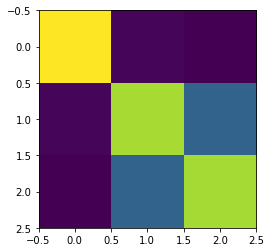

In [50]:
#Creating a Heatplot based on pairwise data
#storing fasta data of all three proteins into the variable "Fasta"
Fasta = list(SeqIO.parse("Proteins_Total", "fasta"))

#measuring the size of the sequences and storing into variable "size"
size = len(Fasta)

#Initiate variable i and j for for loop
i = 0
j = 0

#creating an empty matrix for the size of the fasta file
alignments_score = np.empty(shape=(size,size))

#Creating a fucntion: Nested for loop to do pairwise sequence alignment for each pair of the proteins
def pairwise_seq_heatmap(my_numpy_array, size):
    for i in range(size):
        for j in range(size):
        # Define two sequences to be aligned as sequences
            X = Fasta[i].seq
            Y = Fasta[j].seq
            print(Fasta[i].id)

        # Get a list of the global alignments
        # No parameters. Identical characters have score of 1, else 0.
        # No gap penalties.
            my_numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))

    return my_numpy_array
# Check that the for loop correctly created the matrix
My_alignment_Scores = pairwise_seq_heatmap(alignments_score, size)
#code check
#check that the alignment scores are palced correctly
# print(My_alignments_score)

# normalize = np.amax(My_alignment_Scores)
# My_alignment_Scores = My_alignment_Scores/normalize
# print(My_alignment_Scores)

#Create subplot
fig, ax = plt.subplots()

# Actually show the heatplot
plt.imshow(alignments_score)

# Construct the heat map to show the axes
im = ax.imshow(alignments_score)

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)


# Show the plot
plt.show()



### Analysis of Result

In the heatplot shown above each box represents a similarity scoring value that was taken from the pairwise sequence alignment. Along the diagonal is where the sequences are being aligned to themselves and so the scores are very high. Along the sides, where the colors are darker shows how the sequnce of the protein from Tuber Magnatum is aligning to the Tuber Melanosporum and Saccharomyces Cerevisiae protein. The Tuber Magnatum is showing very low alignment when being compared to both the Tuber Melanosporum and the Saccharomyces Cerevisiae protein.

### References


global variable = can be refereneced at any point inthe code

local vairiable = only exists within the function, outside the function, it doesn't exist